# Walmart Sales Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WALMART_SALES_DATA.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [7]:
df.Date = pd.to_datetime(df.Date)

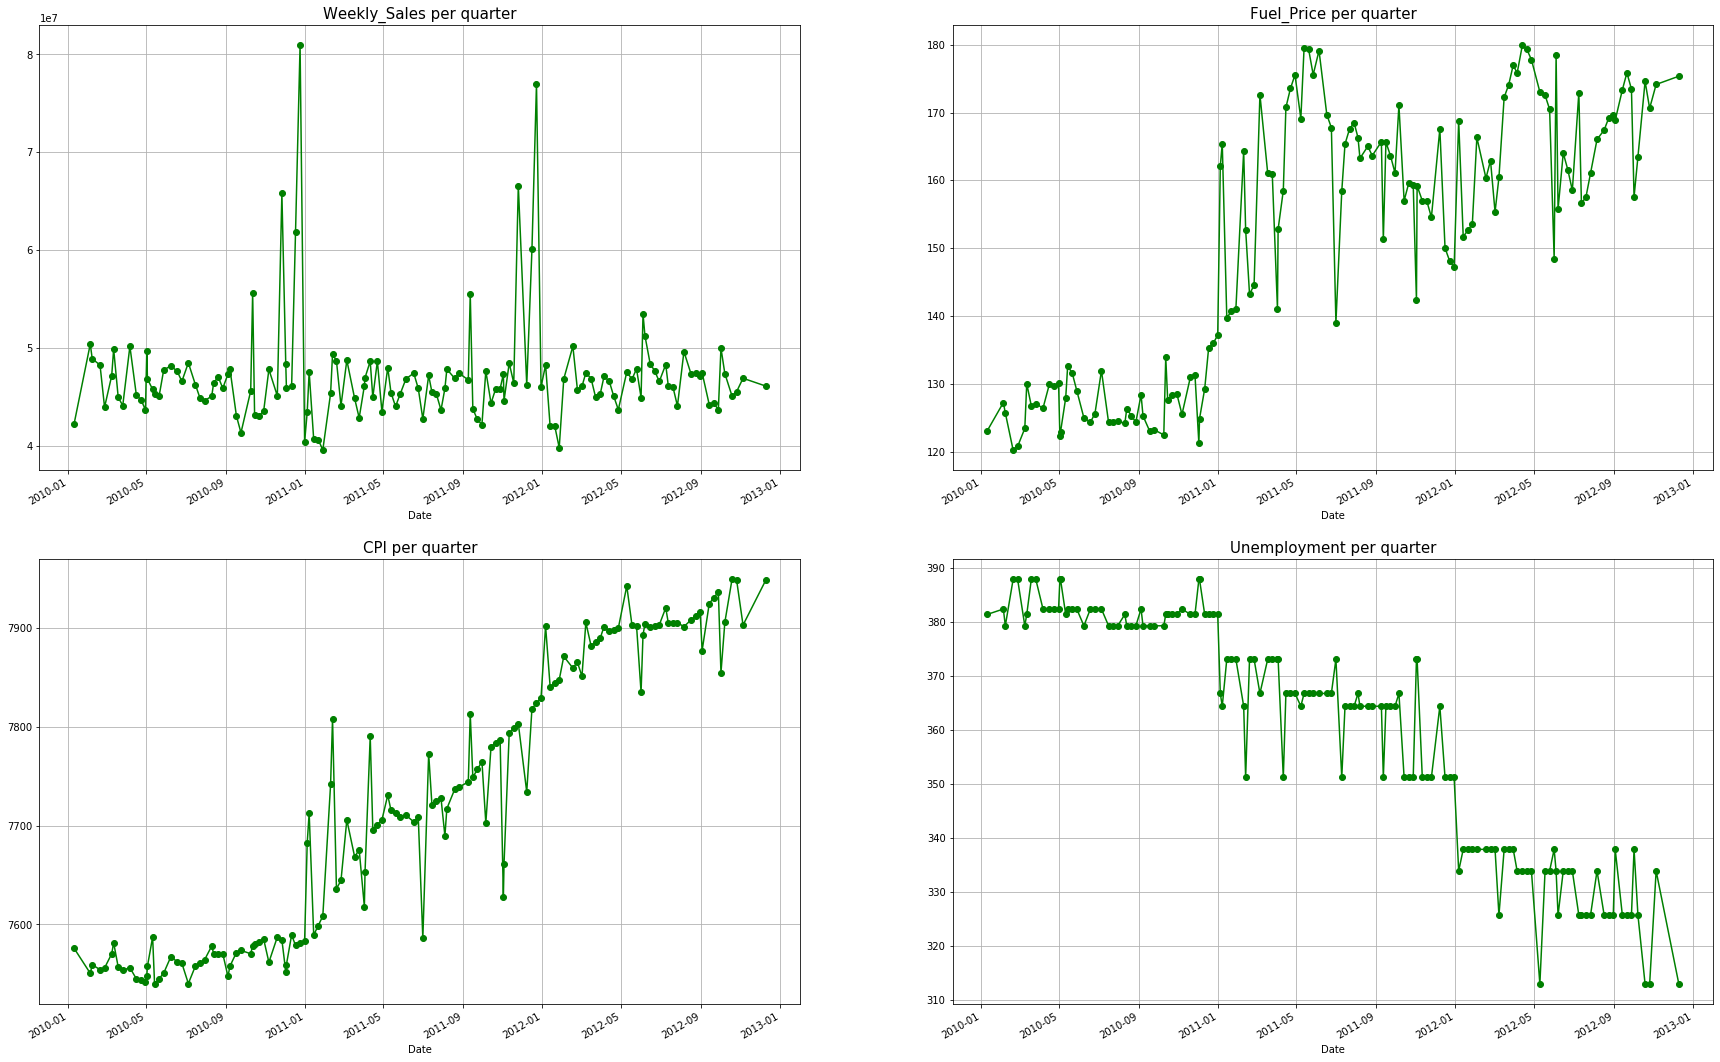

In [8]:
# Values per quarter
a = 1
plt.figure(figsize=[30,20])
for i in df[['Weekly_Sales','Fuel_Price','CPI','Unemployment']].columns:
    plt.subplot(2,2,a) 
    df.groupby(['Date'])[i].sum().plot(grid=True, color = 'green', marker='o');
    plt.title(f'{i} per quarter', size=15)
    a+=1

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
pip install seaborn --upgrade

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


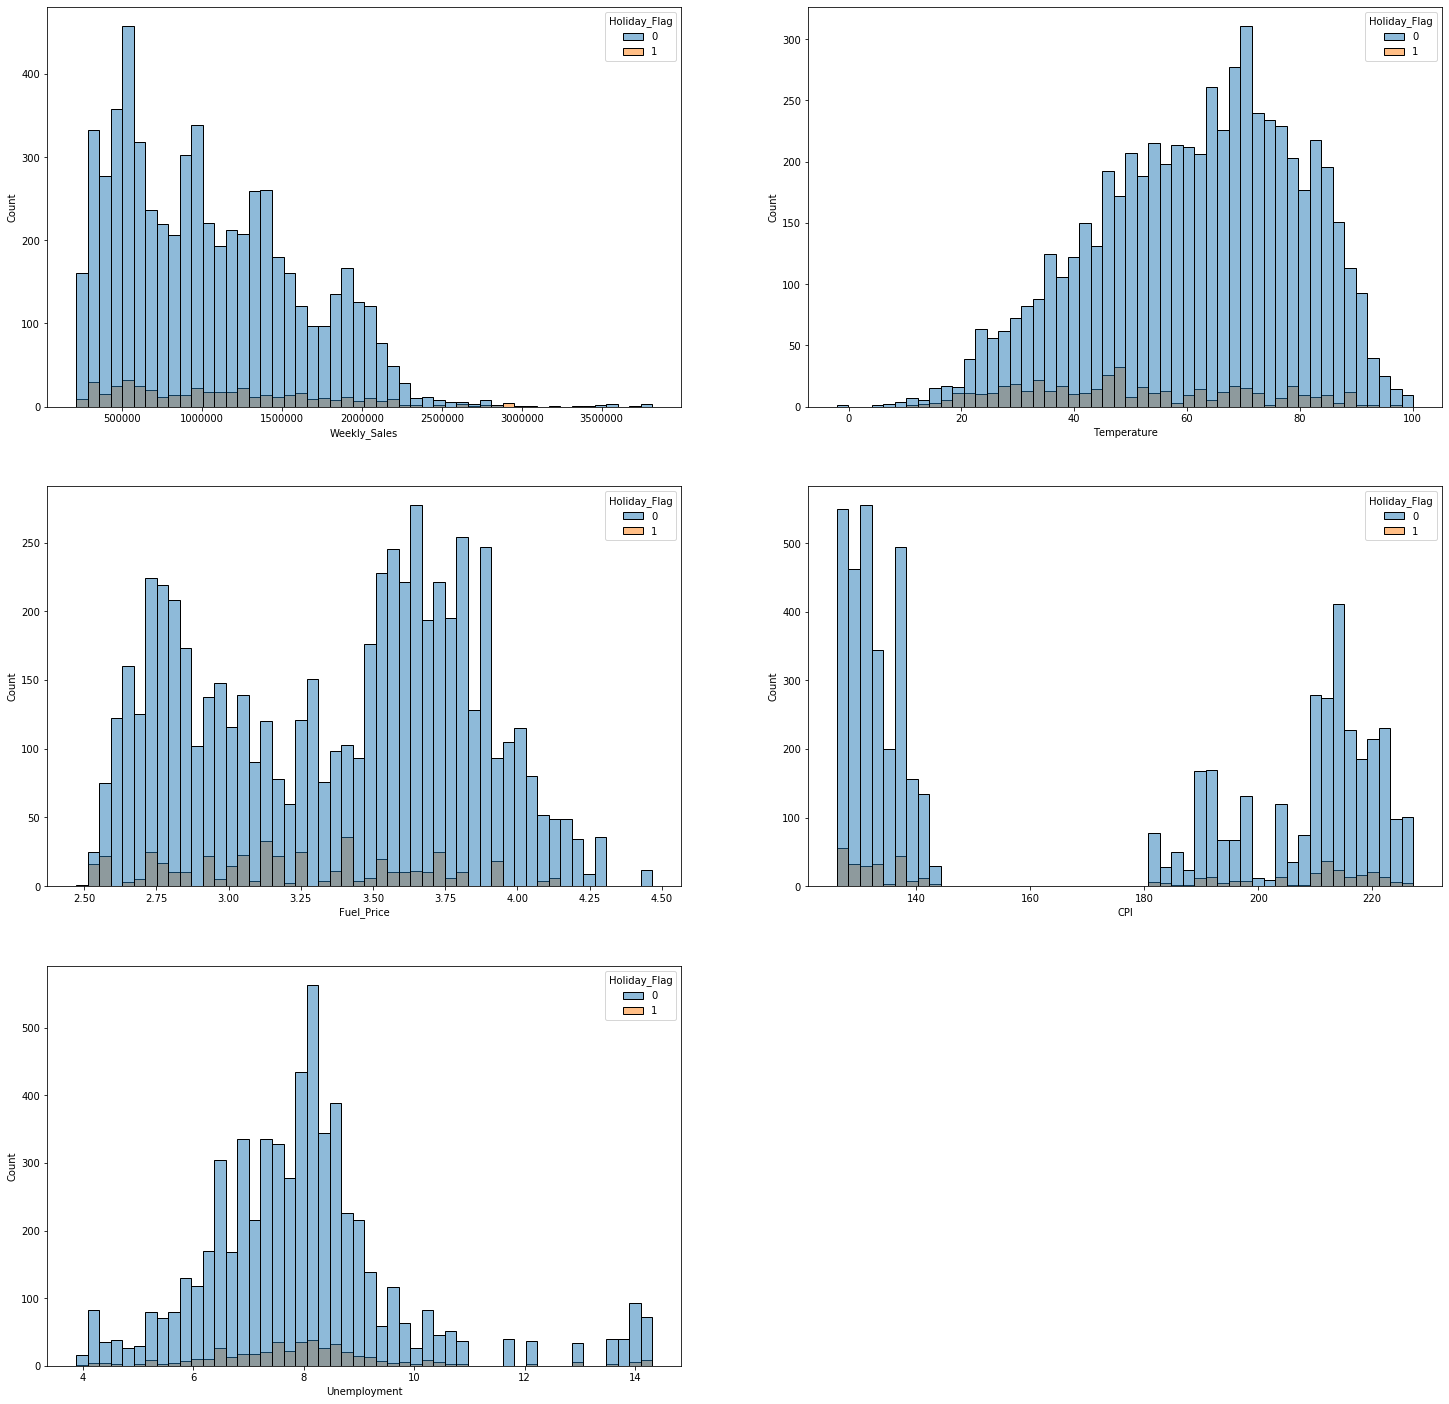

In [10]:
a=1
plt.figure(figsize=[25,25])
for i in df.iloc[:,2:].columns:
    if i=='Holiday_Flag':
        continue
    plt.subplot(3,2,a)    
    sns.histplot(x=i, bins = 50, hue = 'Holiday_Flag',  data=df);
    a+=1

## Some Tasks

### Best selling stores

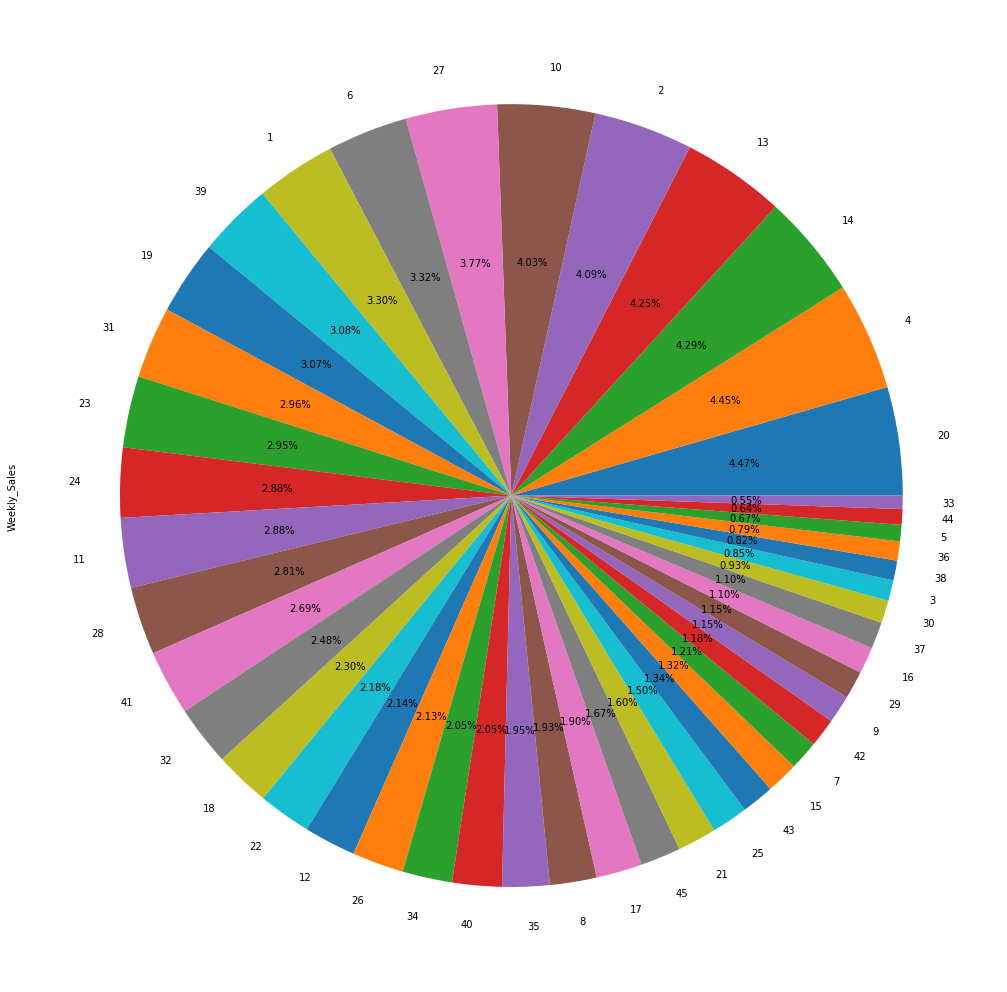

In [11]:
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot.pie(figsize = [18,18],autopct='%1.2f%%');

### The sales performance of each store over time

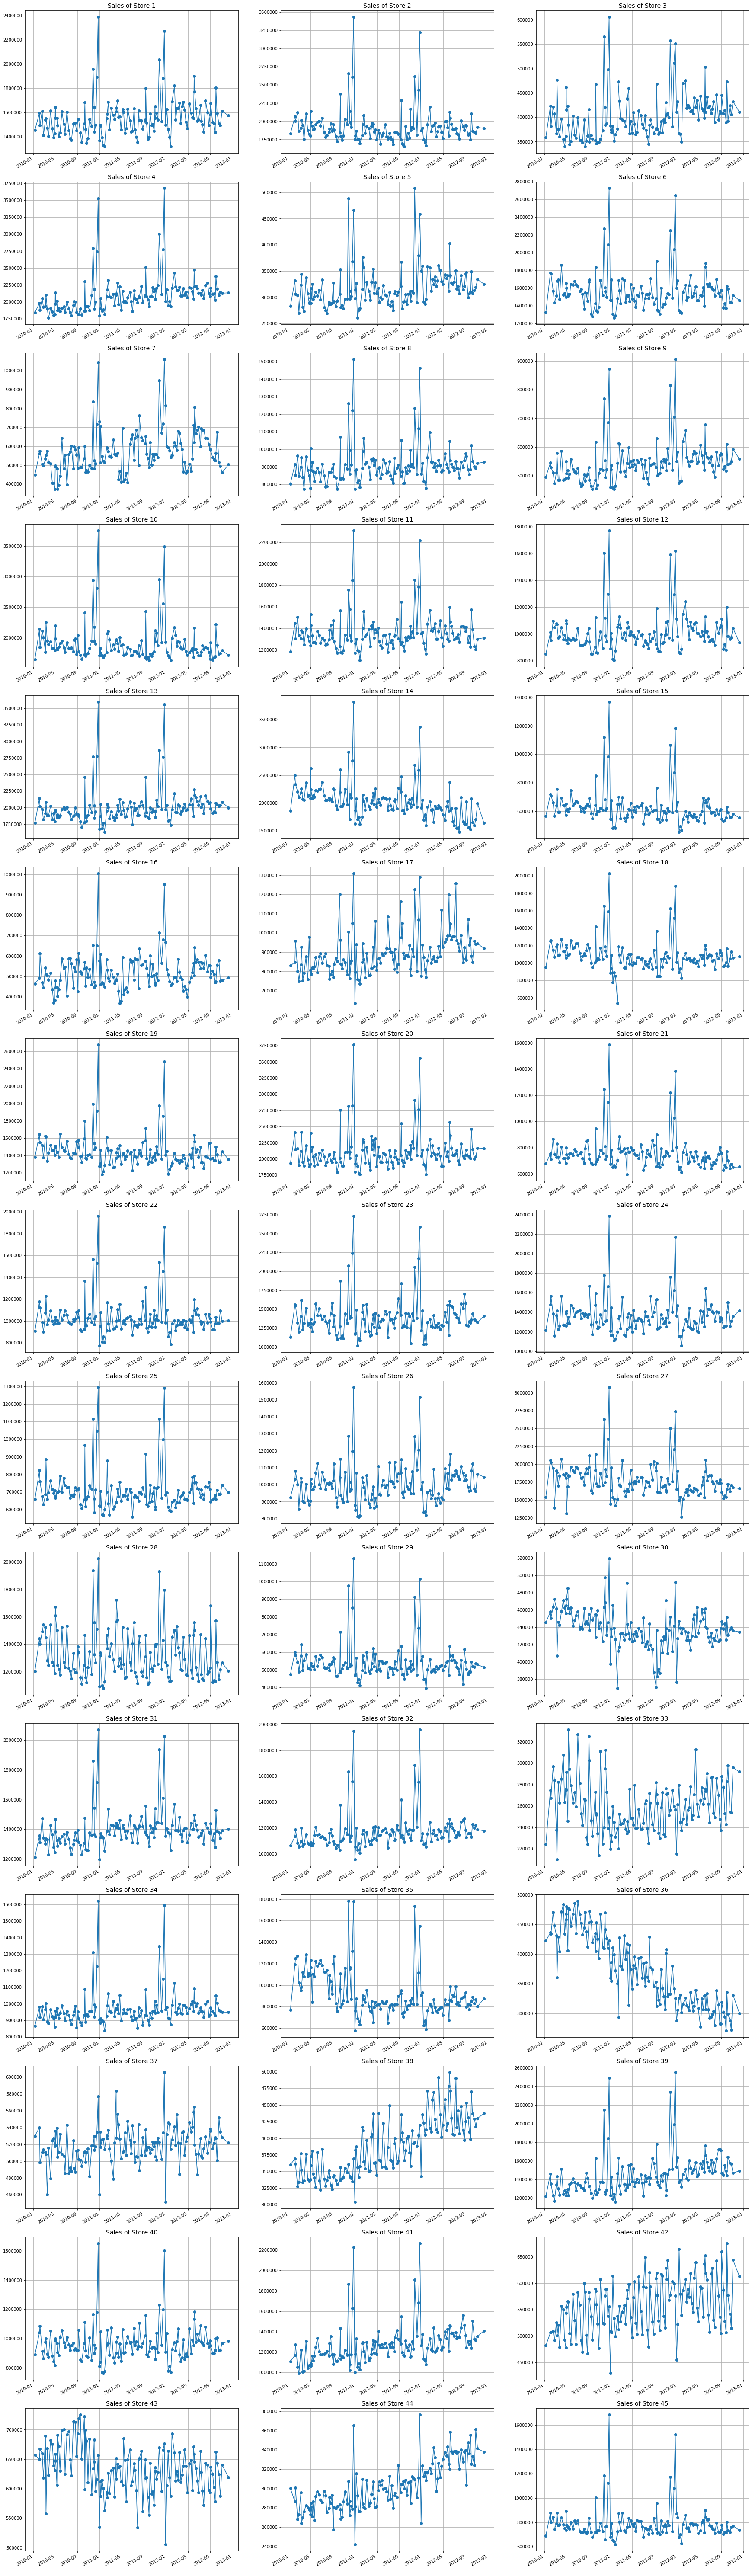

In [12]:
a = 1
plt.figure(figsize=(30,120))
for i in df.Store.unique():
    plt.subplot(15,3,a)
    df[df.Store==i].groupby('Date')['Weekly_Sales'].sum().plot(grid=True, marker='o');
    plt.xlabel(' ')
    plt.title(f'Sales of Store {i}',size=14)
    a+=1

### Sales in Holidays

In [13]:
def SalesMean(dates):
    means = []
    for i in dates:
        means.append(df[(df.Date == i)].Weekly_Sales.mean())
    means.append(df.Weekly_Sales.mean())
    pd.Series(means, index = ['Super_Bowl','Labour_Day','Thanksgiving','Christmas', 'Tot_mean']).plot(kind='bar');

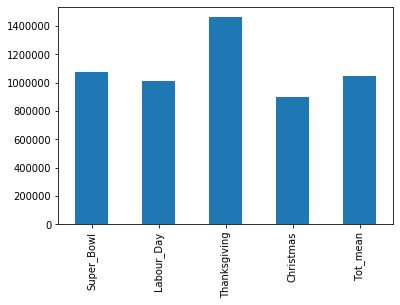

In [14]:
# 2010
SalesMean(['12-02-2010','10-09-2010','26-11-2010','31-12-2010'])

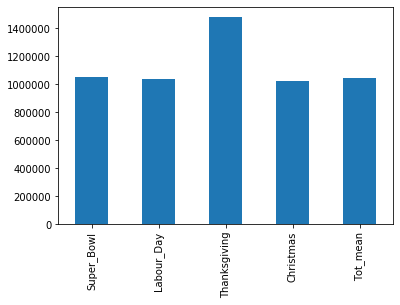

In [15]:
# 2011
SalesMean(['11-02-2011','09-09-2011','25-11-2011','30-12-2011'])

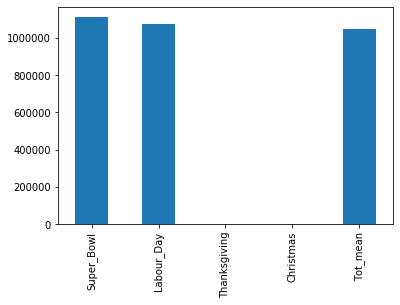

In [16]:
# 2012
SalesMean(['10-02-2012','07-09-2012','23-11-2012','28-12-2012'])

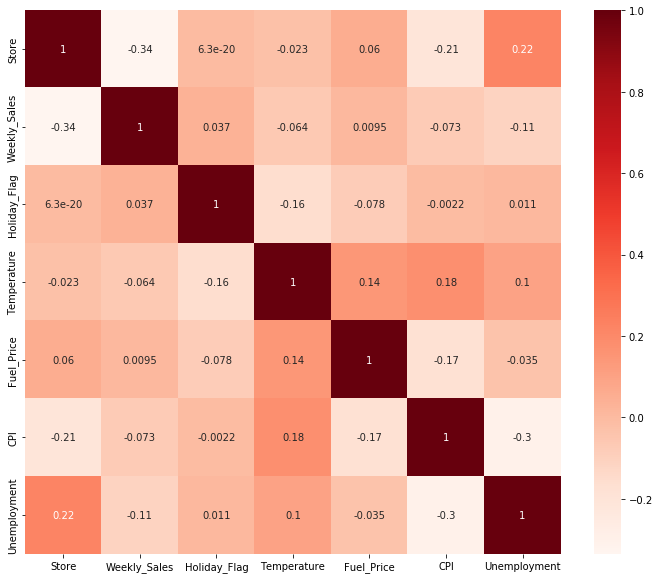

In [17]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), annot=True, cmap='Reds');

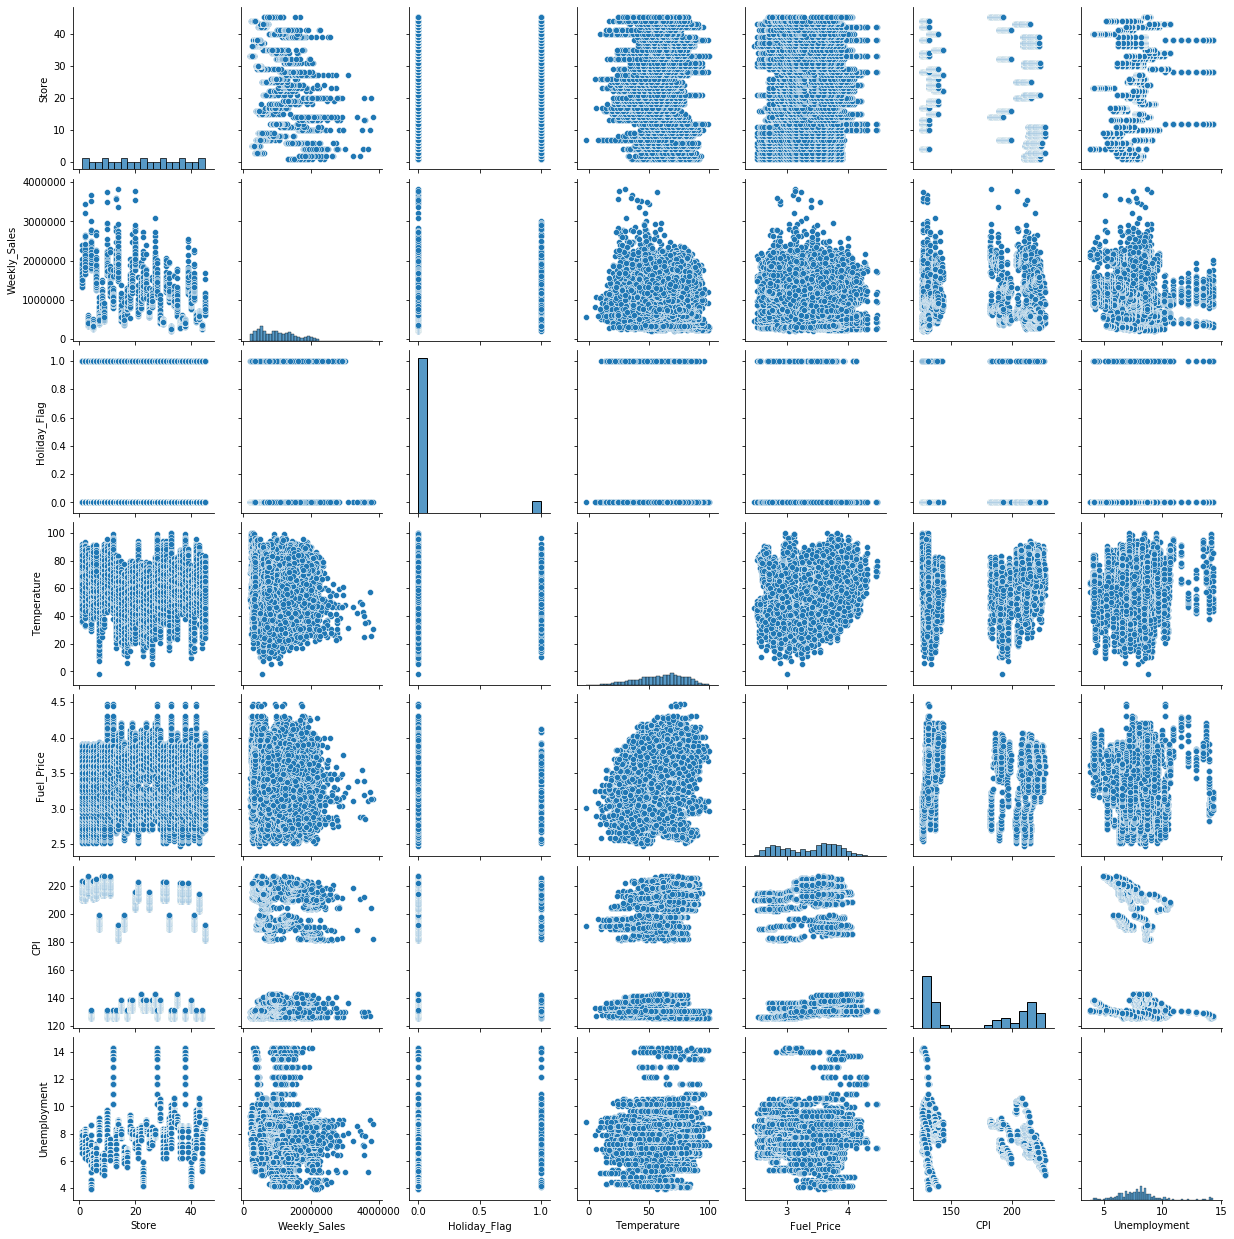

In [18]:
sns.pairplot(df);

## Size Reduction

In [19]:
df = pd.get_dummies(df, columns=['Store','Date'])
df

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0       1643690.90             0        42.31       2.572  211.096358   
1       1641957.44             1        38.51       2.548  211.242170   
2       1611968.17             0        39.93       2.514  211.289143   
3       1409727.59             0        46.63       2.561  211.319643   
4       1554806.68             0        46.50       2.625  211.350143   
...            ...           ...          ...         ...         ...   
6430     713173.95             0        64.88       3.997  192.013558   
6431     733455.07             0        64.89       3.985  192.170412   
6432     734464.36             0        54.47       4.000  192.327265   
6433     718125.53             0        56.47       3.969  192.330854   
6434     760281.43             0        58.85       3.882  192.308899   

      Unemployment  Store_1  Store_2  Store_3  Store_4  ...  \
0            8.106        1        0        0        0  ...   
1            8.106        1        0        0        0  ...   
2            8.106        1        0        0        0  ...   
3            8.106        1        0        0        0  ...   
4            8.106        1        0        0        0  ...   
...            ...      ...      ...      ...      ...  ...   
6430         8.684        0        0        0        0  ...   
6431         8.667        0        0        0        0  ...   
6432         8.667        0        0        0        0  ...   
6433         8.667        0        0        0        0  ...   
6434         8.667        0        0        0        0  ...   

      Date_2012-09-03 00:00:00  Date_2012-09-14 00:00:00  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
6430                         0                         0   
6431                         0                         0   
6432                         0                         0   
6433                         0                         0   
6434                         0                         0   

      Date_2012-09-21 00:00:00  Date_2012-09-28 00:00:00  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
6430                         0                         1   
6431                         0                         0   
6432                         0                         0   
6433                         0                         0   
6434                         0                         0   

      Date_2012-10-02 00:00:00  Date_2012-10-08 00:00:00  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
6430                         0                         0   
6431                         0                         0   
6432                         0                         0   
6433                         0                         0   
6434                         0                         0   

      Date_2012-10-19 00:00:00  Date_2012-10-26 00:00:00  \
0                            0                         0   
1                            0                         0   
2                            

## Modelling

In [20]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

In [21]:
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [22]:
!pip install catboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [25]:
algorithms = [DecisionTreeRegressor, 
              RandomForestRegressor,
              GradientBoostingRegressor,
              LinearRegression,
              KNeighborsRegressor,
              MLPRegressor,
              XGBRegressor,
              CatBoostRegressor,
              SVR]

In [26]:
MAE =[]
RMSE = []
ALGORITHMS = [] 

def Prediction(algorithm):
    if algorithm == CatBoostRegressor:
        model = algorithm(verbose=0).fit(X_train,y_train)
    else:
        model = algorithm().fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    print(f'{algorithm.__name__} R2_Score : ', r2_score(y_test, y_pred))
    ALGORITHMS.append(algorithm.__name__)
    MAE.append(mean_absolute_error(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, color='white', edgecolors = 'black')
    plt.title(algorithm.__name__, size=15)

DecisionTreeRegressor R2_Score :  0.9170523210817202
RandomForestRegressor R2_Score :  0.9259636994326994
GradientBoostingRegressor R2_Score :  0.8169853098616235
LinearRegression R2_Score :  0.9543231679648925
KNeighborsRegressor R2_Score :  0.3037897543467071


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor R2_Score :  -0.85851636320549
XGBRegressor R2_Score :  0.9569769194333211
CatBoostRegressor R2_Score :  0.962329844122941
SVR R2_Score :  -0.022234374970859783


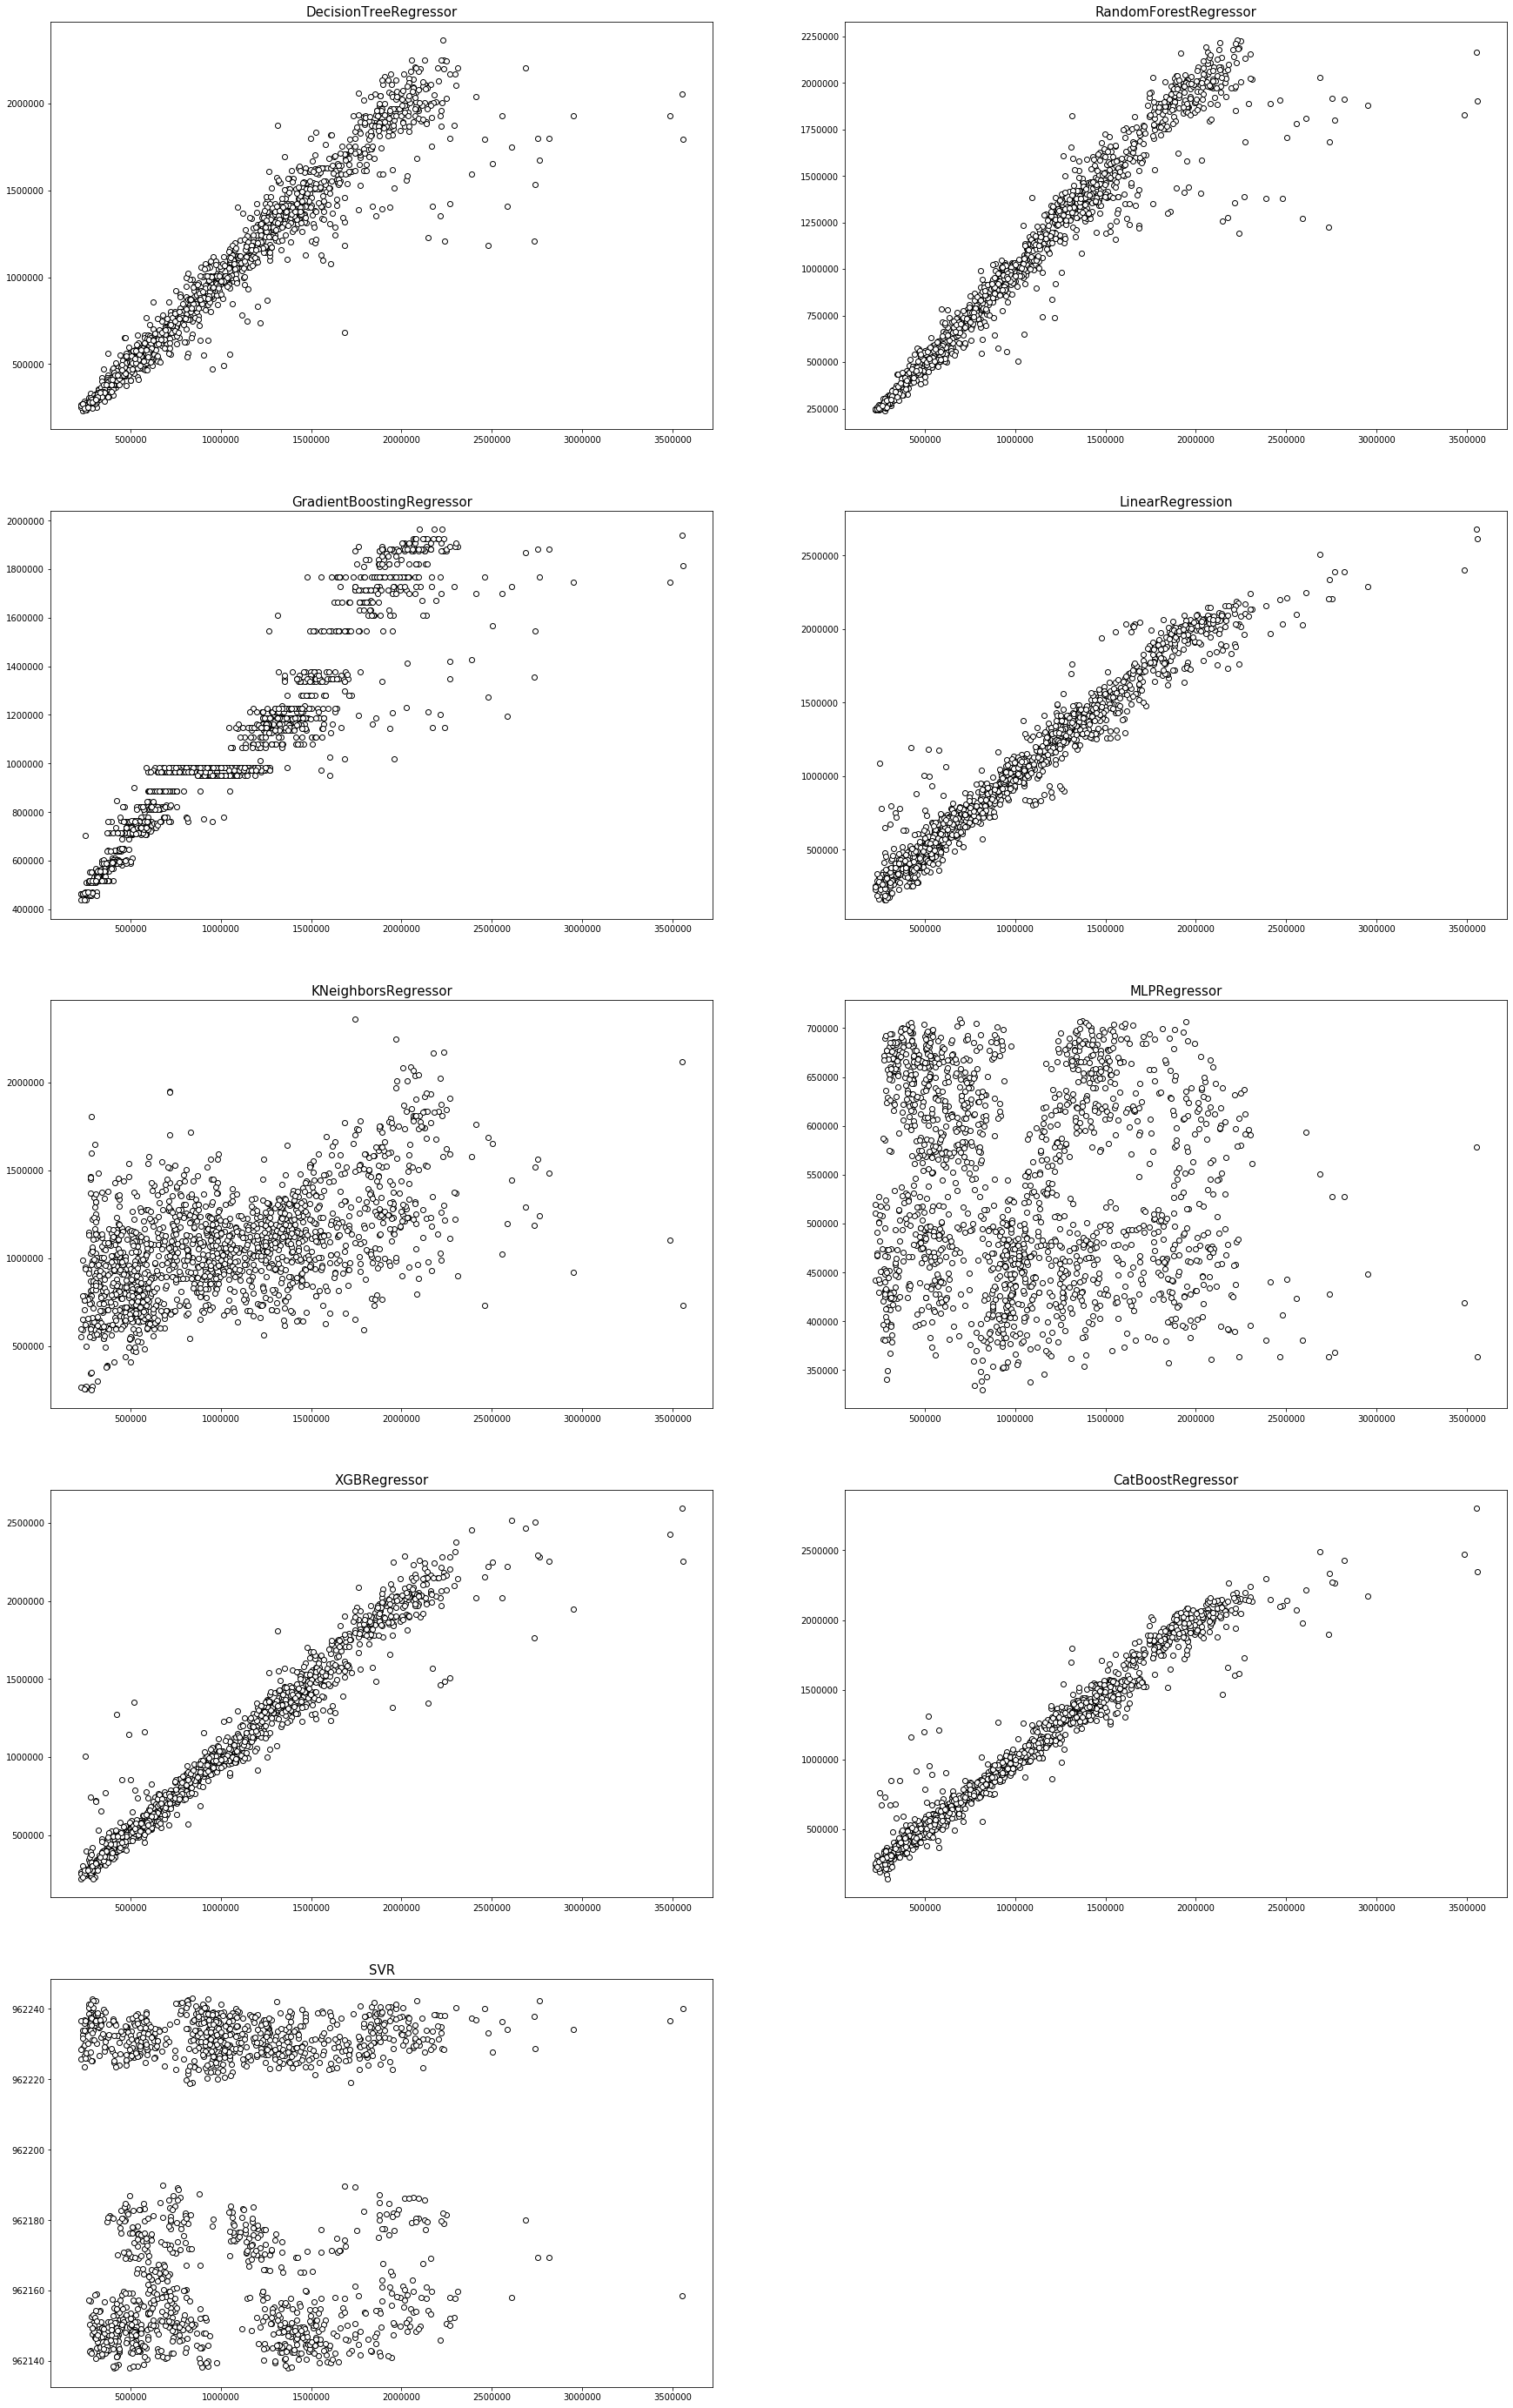

In [27]:
a = 1    
plt.figure(figsize=[30,50])
for i in algorithms:
    plt.subplot(5,2,a)
    Prediction(i)
    a+=1

### MAE and RMSE

In [28]:
errors = pd.DataFrame({'ALGORITHMS':ALGORITHMS, 'MAE': MAE, 'RMSE': RMSE})
errors

ALGORITHMS            MAE           RMSE
0      DecisionTreeRegressor   79505.450317  164998.572376
1      RandomForestRegressor   69989.693248  155883.598440
2  GradientBoostingRegressor  191233.231378  245087.432964
3           LinearRegression   76932.534077  122440.770896
4        KNeighborsRegressor  372453.658144  478022.427203
5               MLPRegressor  596666.837737  781018.394011
6               XGBRegressor   61975.964609  118830.744894
7          CatBoostRegressor   59746.322535  111192.828091
8                        SVR  474144.182980  579233.015541

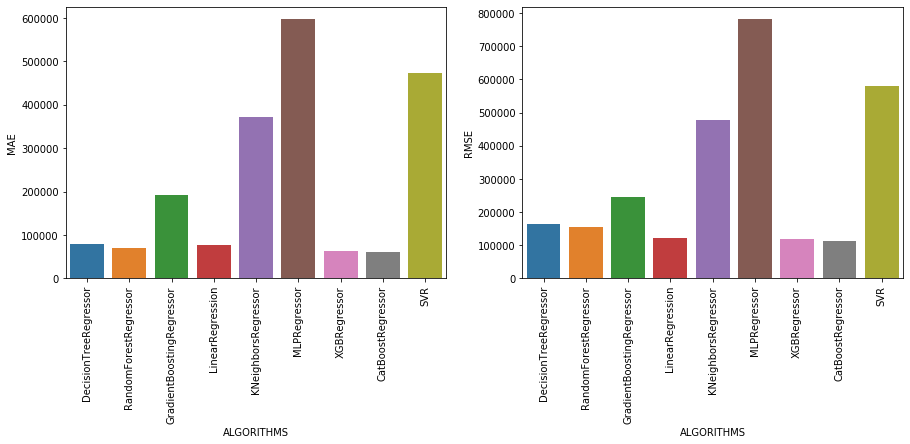

In [29]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.barplot(data=errors, y='MAE', x='ALGORITHMS')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=errors, y='RMSE', x='ALGORITHMS')
plt.xticks(rotation=90);